## Data Exploration

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.preprocessing import StandardScaler


In [2]:
# import dataset
bike_dataset = pd.read_csv("BIKE DETAILS.csv")

In [3]:
# check first 5 rows
bike_dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
# check last 5 rows
bike_dataset.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [5]:
# check number of rows and columns of dataset
bike_dataset.shape

(1061, 7)

In [6]:
# check product of number of rows and columns of dataset
bike_dataset.size

7427

In [7]:
# check the columns
bike_dataset.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [8]:
# check the information
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## Data Cleaning

In [9]:
# check null values
bike_dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
# drop all null values
bike_dataset.dropna(inplace=True)

In [11]:
# recheck null values
bike_dataset.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [12]:
# check duplicate rows
bike_dataset.duplicated().sum()

4

In [13]:
# drop duplicate rows
bike_dataset.drop_duplicates(inplace=True)

In [14]:
# recheck shape
bike_dataset.shape

(622, 7)

## Data Encoding/ Pre-Processing


In [15]:
# check distribution of categorical data
print(bike_dataset.owner.value_counts())
print(bike_dataset.seller_type.value_counts())

1st owner    552
2nd owner     66
3rd owner      3
4th owner      1
Name: owner, dtype: int64
Individual    619
Dealer          3
Name: seller_type, dtype: int64


In [16]:
# encoding "Owner" Column
bike_dataset.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2, '4th owner':3}},inplace=True)

# encoding "Seller_Type" Column
bike_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

In [17]:
bike_dataset

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,0,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,0,23000,89643.0
5,Honda CB Twister,18000,2010,1,0,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,1,0,17000,87719.0
9,Bajaj Discover 125,50000,2016,1,0,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1,0,500000,52000.0
1057,Honda CB twister,16000,2012,1,0,33000,51000.0
1058,Bajaj Discover 125,15000,2013,1,1,35000,57000.0
1059,Honda CB Shine,12000,2009,1,0,53000,58000.0


In [18]:
from datetime import datetime

# Create 'vehicle_age' from the 'year' feature
current_year = datetime.now().year
bike_dataset['vehicle_age'] = current_year - bike_dataset['year']



In [19]:
# Drop the 'year' column as it's no longer needed
bike_dataset.drop(columns=['year'], inplace=True)

In [20]:
bike_dataset.head()

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
2,Royal Enfield Classic Gunmetal Grey,150000,1,0,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,1,0,23000,89643.0,9
5,Honda CB Twister,18000,1,0,60000,53857.0,14
6,Honda CB Hornet 160R,78500,1,0,17000,87719.0,6
9,Bajaj Discover 125,50000,1,0,42000,60122.0,8


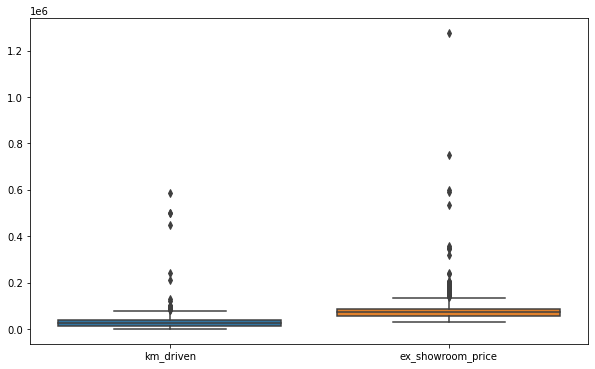

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot for each numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_dataset[['km_driven', 'ex_showroom_price']])
plt.show()


In [22]:
bike_dataset["km_driven"].describe()

count       622.000000
mean      32482.969453
std       45516.696841
min         380.000000
25%       13000.000000
50%       25000.000000
75%       40000.000000
max      585659.000000
Name: km_driven, dtype: float64

In [23]:
bike_dataset[bike_dataset["km_driven"]> 60000]  #54

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
31,Yamaha FZ S [2012-2016],38000,1,0,75000,79432.0,11
43,Hero Passion XPro,28000,1,0,81000,56750.0,12
61,Hero Xtreme Sports,50000,1,0,80000,80350.0,10
91,Honda Activa [2000-2015],22989,1,0,500000,50267.0,12
93,Suzuki GS150R,30000,1,0,130000,70851.0,14
125,Bajaj Discover 100,20000,1,0,85000,42859.0,12
154,Hero Xtreme Sports,22000,1,0,99000,78350.0,10
172,Bajaj Discover 150,25000,1,1,71000,54299.0,10
184,Honda CB Unicorn 160,75000,1,0,100000,79233.0,9
187,Bajaj Pulsar 180,25000,1,0,80000,85011.0,17


In [24]:
bike_dataset["ex_showroom_price"].describe()

count    6.220000e+02
mean     8.806079e+04
std      7.772528e+04
min      3.049000e+04
25%      5.485200e+04
50%      7.275250e+04
75%      8.703150e+04
max      1.278000e+06
Name: ex_showroom_price, dtype: float64

In [25]:
bike_dataset[bike_dataset["ex_showroom_price"]> 10.703150e+04] 

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
2,Royal Enfield Classic Gunmetal Grey,150000,1,0,12000,148114.0,6
13,Yamaha YZF R3,365000,1,0,1127,351680.0,5
17,Yamaha YZF R15 S,40000,1,1,45000,117926.0,14
18,Royal Enfield Classic Gunmetal Grey,150000,1,0,23000,148114.0,6
19,Yamaha FZ25,120000,1,0,39000,132680.0,6
...,...,...,...,...,...,...,...
983,Royal Enfield Classic 350,100000,1,0,46500,147000.0,9
984,Royal Enfield Classic 500,95000,1,0,11500,175000.0,10
985,Royal Enfield Classic 500,90000,1,0,40000,175000.0,13
996,Honda CBR 150,65000,1,0,23500,120000.0,8


In [26]:
bike_dataset["selling_price"].describe()

count       622.000000
mean      59565.390675
std       60055.506495
min        6000.000000
25%       30000.000000
50%       45000.000000
75%       65000.000000
max      760000.000000
Name: selling_price, dtype: float64

In [27]:
bike_dataset[bike_dataset["selling_price"]> 90000] 

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
2,Royal Enfield Classic Gunmetal Grey,150000,1,0,12000,148114.0,6
13,Yamaha YZF R3,365000,1,0,1127,351680.0,5
18,Royal Enfield Classic Gunmetal Grey,150000,1,0,23000,148114.0,6
19,Yamaha FZ25,120000,1,0,39000,132680.0,6
37,Honda CBR-250R,120000,1,0,16000,202310.0,8
...,...,...,...,...,...,...,...
980,Bajaj Pulsar RS200,105000,1,0,5700,126000.0,6
981,Royal Enfield Thunder 350,105000,1,0,6900,150000.0,11
982,Royal Enfield Bullet 350,105000,1,0,6000,117000.0,6
983,Royal Enfield Classic 350,100000,1,0,46500,147000.0,9


In [28]:
clean_data=bike_dataset[ (bike_dataset["ex_showroom_price"]< 10.703150e+04) & (bike_dataset["selling_price"]< 90000)]

In [29]:
clean_data

,name,selling_price,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,1,0,23000,89643.0,9
5,Honda CB Twister,18000,1,0,60000,53857.0,14
6,Honda CB Hornet 160R,78500,1,0,17000,87719.0,6
9,Bajaj Discover 125,50000,1,0,42000,60122.0,8
10,Yamaha FZ16,35000,1,0,32000,78712.0,9
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,1,0,500000,52000.0,14
1057,Honda CB twister,16000,1,0,33000,51000.0,12
1058,Bajaj Discover 125,15000,1,1,35000,57000.0,11
1059,Honda CB Shine,12000,1,0,53000,58000.0,15


## LMS ALGORITHM


In [30]:
# split data into X and Y
X = clean_data.drop(['name','selling_price'],axis=1)
Y = clean_data['selling_price']

In [31]:
X

,seller_type,owner,km_driven,ex_showroom_price,vehicle_age
3,1,0,23000,89643.0,9
5,1,0,60000,53857.0,14
6,1,0,17000,87719.0,6
9,1,0,42000,60122.0,8
10,1,0,32000,78712.0,9
...,...,...,...,...,...
1056,1,0,500000,52000.0,14
1057,1,0,33000,51000.0,12
1058,1,1,35000,57000.0,11
1059,1,0,53000,58000.0,15


In [32]:
Y

3       65000
5       18000
6       78500
9       50000
10      35000
        ...  
1056    17000
1057    16000
1058    15000
1059    12000
1060    10000
Name: selling_price, Length: 512, dtype: int64

### SCALING

In [33]:
scaler_x = StandardScaler()
X_standardized = scaler_x.fit_transform(X)


In [34]:
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(Y.values.reshape(-1,1))

In [35]:
y_standardized = y_standardized.reshape(-1)

In [36]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, y_standardized, test_size = 0.1, random_state=2)

In [37]:
X.shape

(512, 5)

In [38]:
def LMS_algorithm(X, y, learning_rate, epochs):
    m, n = X.shape  # Number of samples (m) and features (n)
    # Randomly initialize weights instead of zeros
    weights = np.random.randn(n) * 0.01  # Initialize small random weights

    bias = 0  # Initialize bias term
    mse_list = []  # List to store Mean Squared Error for each epoch

    # Training loop for LMS
    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias  # Linear prediction (y = Xw + b)
        error = y_pred - y  # Error calculation (predicted - actual)

        # Update weights and bias using the LMS rule
        weights -= learning_rate * (1/m) * np.dot(X.T, error)
        bias -= learning_rate * (1/m) * np.sum(error)

        # Calculate Mean Squared Error (MSE)
        mse = (1/m) * np.sum(error ** 2)
        mse_list.append(mse)

    return weights, bias, mse_list

## Learning_rate = 0.001

In [39]:
learning_rate = 0.001  # Initial learning rate (step-size)
epochs = 2000  # Number of iterations

# Training the model using the LMS algorithm
weights, bias, mse_list = LMS_algorithm(X_train, Y_train, learning_rate, epochs)

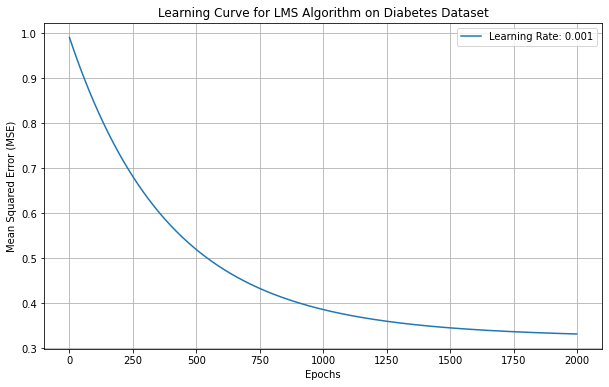

Weights: [-0.01364506 -0.0797274  -0.07530364  0.40230205 -0.52404245]
Bias: -0.009042751966559931
Test MSE for learning rate 0.001: 0.4284885937954641


In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), mse_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for LMS Algorithm on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Display the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

y_pred_test = np.dot(X_test, weights) + bias

# Calculate MSE on the test set
test_mse = np.mean((y_pred_test - Y_test) ** 2)
print(f"Test MSE for learning rate {learning_rate}: {test_mse}")

## learning rates 0.002, 0.003, 0.004, 0.006, 0.01


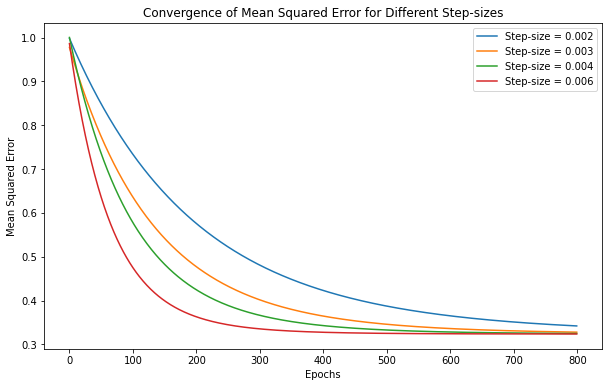

Test MSE for step-size 0.002: 0.4423
Test MSE for step-size 0.003: 0.4201
Test MSE for step-size 0.004: 0.4136
Test MSE for step-size 0.006: 0.4106


In [41]:
etas = [ 0.002, 0.003, 0.004, 0.006]
epochs = 800
weights = {}
errors = {}

# Training for different step-sizes
for eta in etas:
    W, bias, error_list = LMS_algorithm(X_train, Y_train, eta, epochs)
    weights[eta] = W
    errors[eta] = error_list

# Plot the convergence of error for each step-size
plt.figure(figsize=(10, 6))
for eta in etas:
    plt.plot(errors[eta], label=f'Step-size = {eta}')
plt.title('Convergence of Mean Squared Error for Different Step-sizes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate on test set
def evaluate(W, X_test, y_test):
    y_pred = np.dot(X_test, W)
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

# Evaluate each model with the test set
for eta in etas:
    W = weights[eta]
    test_mse = evaluate(W, X_test, Y_test)
    print(f'Test MSE for step-size {eta}: {test_mse:.4f}')

##  LEARNING RATES 0.01, 0.015, 0.02, 0.03, 0.05

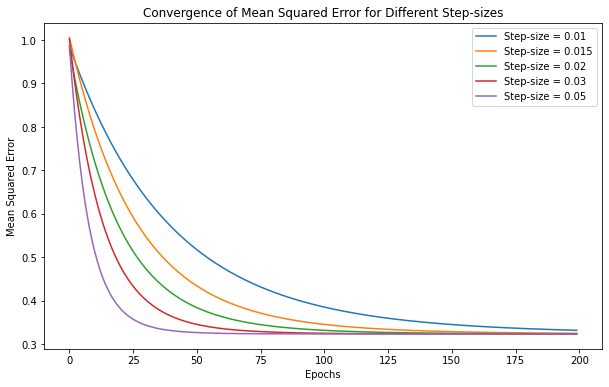

Test MSE for step-size 0.01: 0.4272
Test MSE for step-size 0.015: 0.4146
Test MSE for step-size 0.02: 0.4113
Test MSE for step-size 0.03: 0.4102
Test MSE for step-size 0.05: 0.4101


In [42]:
etas = [0.01, 0.015, 0.02, 0.03, 0.05]
epochs = 200
weights = {}
errors = {}

# Training for different step-sizes
for eta in etas:
    W, bias, error_list = LMS_algorithm(X_train, Y_train, eta, epochs)
    weights[eta] = W
    errors[eta] = error_list

# Plot the convergence of error for each step-size
plt.figure(figsize=(10, 6))
for eta in etas:
    plt.plot(errors[eta], label=f'Step-size = {eta}')
plt.title('Convergence of Mean Squared Error for Different Step-sizes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate on test set
def evaluate(W, X_test, y_test):
    y_pred = np.dot(X_test, W)
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

# Evaluate each model with the test set
for eta in etas:
    W = weights[eta]
    test_mse = evaluate(W, X_test, Y_test)
    print(f'Test MSE for step-size {eta}: {test_mse:.4f}')

## learning rate 0.1

In [43]:
learning_rate = 0.1  # Initial learning rate (step-size)
epochs = 50  # Number of iterations

# Training the model using the LMS algorithm
weights, bias, mse_list = LMS_algorithm(X_train, Y_train, learning_rate, epochs)

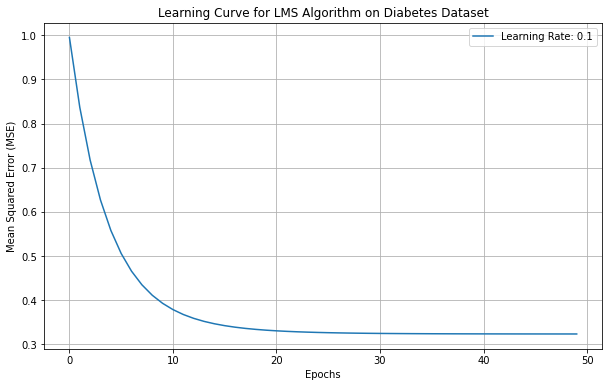

Weights: [-0.00948907 -0.06730376 -0.03755926  0.44154651 -0.59732847]
Bias: -0.0058385831788003925
Test MSE for learning rate 0.1: 0.411006698804935


In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), mse_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for LMS Algorithm on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Display the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

y_pred_test = np.dot(X_test, weights) + bias

# Calculate MSE on the test set
test_mse = np.mean((y_pred_test - Y_test) ** 2)
print(f"Test MSE for learning rate {learning_rate}: {test_mse}")